In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rnd
from tqdm import tqdm_notebook #gives a progress bar

# visualizatoin
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
plt.style.use('ggplot')


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
train = pd.read_csv('../input/predict-future-sales-eda/Training_Data.csv')

categories = pd.read_csv("../input/competitive-data-science-predict-future-sales/item_categories.csv")
items = pd.read_csv("../input/competitive-data-science-predict-future-sales/items.csv")
shops = pd.read_csv("../input/competitive-data-science-predict-future-sales/shops.csv")

test = pd.read_csv("../input/competitive-data-science-predict-future-sales/test.csv")



## Initialize

In [2]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name,Month,m_num
0,2013-01-02,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray,Jan,1
1,2013-01-03,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил,Jan,1
2,2013-01-06,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",Музыка - Винил,Jan,1
3,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства,Jan,1
4,2013-01-10,0,25,2564,349.00,1.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,"Москва ТРК ""Атриум""",Музыка - Музыкальное видео,Jan,1


In [3]:
train.shape

(2925077, 12)

In [4]:
test.tail(30)

,ID,shop_id,item_id
214170,214170,45,14543
214171,214171,45,19253
214172,214172,45,17957
214173,214173,45,12470
214174,214174,45,7543
214175,214175,45,6661
214176,214176,45,11137
214177,214177,45,11489
214178,214178,45,9782
214179,214179,45,2972


Test only has shop_id and item_id. Doesn't need date_block_num because we already know the test data is for month 34, so they will all be the same. Doesn't need item_cnt_day because that is what we are trying to find. Excetp for the whole month. 

We need to drop the ID column because there are two with the same for test.

In [5]:
test.drop('ID', axis=1, inplace=True)

In [6]:
test.tail()

,shop_id,item_id
214195,45,18454
214196,45,16188
214197,45,15757
214198,45,19648
214199,45,969


In [7]:
print("test: ", test.item_id.agg([min, max]))
print("train: ", train.item_id.agg([min, max]))

test:  min       30
max    22167
Name: item_id, dtype: int64
train:  min        0
max    22169
Name: item_id, dtype: int64


This shows they share some of the same items being sold.

In [8]:
train.nunique()

date                   1034
date_block_num           34
shop_id                  60
item_id               21803
item_price            19221
item_cnt_day             20
item_name             21803
item_category_id         84
shop_name                60
item_category_name       84
Month                    12
m_num                    12
dtype: int64

In [9]:
print("test: ", test.shop_id.agg([min, max]))
print("test: ", train.shop_id.agg([min, max]))

test:  min     2
max    59
Name: shop_id, dtype: int64
test:  min     0
max    59
Name: shop_id, dtype: int64


### Feature Engineering: Test

Create new features in the test set that we know will be constant
1. date_block_num: 34
2. Month: Nov
3. m_num: 11


In [10]:
traintest = pd.concat([train, test], axis=0)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [11]:
traintest.tail(30)

,Month,date,date_block_num,item_category_id,item_category_name,item_cnt_day,item_id,item_name,item_price,m_num,shop_id,shop_name
214170,NaN,NaN,NaN,NaN,NaN,NaN,14543,NaN,NaN,NaN,45,NaN
214171,NaN,NaN,NaN,NaN,NaN,NaN,19253,NaN,NaN,NaN,45,NaN
214172,NaN,NaN,NaN,NaN,NaN,NaN,17957,NaN,NaN,NaN,45,NaN
214173,NaN,NaN,NaN,NaN,NaN,NaN,12470,NaN,NaN,NaN,45,NaN
214174,NaN,NaN,NaN,NaN,NaN,NaN,7543,NaN,NaN,NaN,45,NaN
214175,NaN,NaN,NaN,NaN,NaN,NaN,6661,NaN,NaN,NaN,45,NaN
214176,NaN,NaN,NaN,NaN,NaN,NaN,11137,NaN,NaN,NaN,45,NaN
214177,NaN,NaN,NaN,NaN,NaN,NaN,11489,NaN,NaN,NaN,45,NaN
214178,NaN,NaN,NaN,NaN,NaN,NaN,9782,NaN,NaN,NaN,45,NaN
214179,NaN,NaN,NaN,NaN,NaN,NaN,2972,NaN,NaN,NaN,45,NaN


In [12]:
traintest.nunique(dropna=False)

Month                    13
date                   1035
date_block_num           35
item_category_id         85
item_category_name       85
item_cnt_day             21
item_id               22166
item_name             21804
item_price            19222
m_num                    13
shop_id                  60
shop_name                61
dtype: int64

So there are 22,166 total item_id's in the combined train and test data. There were 21,803 unique item_id names in the train data. This means that there are only 363 unique items in the new combined data that do not have historical monthly returns in the train data (could be higher than 363 if the new unique values keep appearing over and over again). 

For the test in the new dataset, non of the columns have values except for item_id and shop_id. We need to fill all the other columns we can. 

### Fill NaN Values in Traintest

We can fill values in the columns below because we know what month all of the test data is in.

In [13]:
values = {'Month': 'Nov', 'date_block_num': 34, 'm_num': 11}
traintest = traintest.fillna(value=values)

In [14]:
traintest.tail()

,Month,date,date_block_num,item_category_id,item_category_name,item_cnt_day,item_id,item_name,item_price,m_num,shop_id,shop_name
214195,Nov,NaN,34.0,NaN,NaN,NaN,18454,NaN,NaN,11.0,45,NaN
214196,Nov,NaN,34.0,NaN,NaN,NaN,16188,NaN,NaN,11.0,45,NaN
214197,Nov,NaN,34.0,NaN,NaN,NaN,15757,NaN,NaN,11.0,45,NaN
214198,Nov,NaN,34.0,NaN,NaN,NaN,19648,NaN,NaN,11.0,45,NaN
214199,Nov,NaN,34.0,NaN,NaN,NaN,969,NaN,NaN,11.0,45,NaN


# Feature Engineering

1. Revenue
2. Map by item categories
3. Log10 or log features
4. Lag features (features using lagging data or previous month data)

### 1. Revenue

In [15]:
traintest['Revenue'] = traintest['item_price']*traintest['item_cnt_day']

In [16]:
traintest.head()

,Month,date,date_block_num,item_category_id,item_category_name,item_cnt_day,item_id,item_name,item_price,m_num,shop_id,shop_name,Revenue
0,Jan,2013-01-02,0.0,37.0,Кино - Blu-Ray,1.0,22154,ЯВЛЕНИЕ 2012 (BD),999.00,1.0,59,"Ярославль ТЦ ""Альтаир""",999.00
1,Jan,2013-01-03,0.0,58.0,Музыка - Винил,1.0,2552,DEEP PURPLE The House Of Blue Light LP,899.00,1.0,25,"Москва ТРК ""Атриум""",899.00
2,Jan,2013-01-06,0.0,58.0,Музыка - Винил,1.0,2554,DEEP PURPLE Who Do You Think We Are LP,1709.05,1.0,25,"Москва ТРК ""Атриум""",1709.05
3,Jan,2013-01-15,0.0,56.0,Музыка - CD фирменного производства,1.0,2555,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),1099.00,1.0,25,"Москва ТРК ""Атриум""",1099.00
4,Jan,2013-01-10,0.0,59.0,Музыка - Музыкальное видео,1.0,2564,DEEP PURPLE Perihelion: Live In Concert DVD (К...,349.00,1.0,25,"Москва ТРК ""Атриум""",349.00


### 2. Map by Category

We are going to map this by category and encode a number to each range of date_block_num. This will make it easier to model. This is done by looking at each item category and grouping them together by what they sell.

In [17]:
train.item_category_id.agg([min, max])

min     0
max    83
Name: item_category_id, dtype: int64

In [18]:
categories.tail()

,item_category_name,item_category_id
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82
83,Элементы питания,83


In [19]:
l = list(categories.item_category_name)
l_cat = l

for ind in range(0,8):
    l_cat[ind] = 'Access'

for ind in range(10,18):
    l_cat[ind] = 'Consoles'

for ind in range(18,25):
    l_cat[ind] = 'Console Games'

for ind in range(26,28):
    l_cat[ind] = 'phone games'

for ind in range(28,32):
    l_cat[ind] = 'CD games'

for ind in range(32,37):
    l_cat[ind] = 'Card'

for ind in range(37,43):
    l_cat[ind] = 'Movie'

for ind in range(43,55):
    l_cat[ind] = 'Books'

for ind in range(55,61):
    l_cat[ind] = 'Music'

for ind in range(61,73):
    l_cat[ind] = 'Gifts'

for ind in range(73,79):
    l_cat[ind] = 'Soft'


categories['cats'] = l_cat

In [20]:
categories.head()

,item_category_name,item_category_id,cats
0,PC - Гарнитуры/Наушники,0,Access
1,Аксессуары - PS2,1,Access
2,Аксессуары - PS3,2,Access
3,Аксессуары - PS4,3,Access
4,Аксессуары - PSP,4,Access


Join cats to train and traintest

In [21]:
traintest = traintest.join(categories, on='item_category_id', rsuffix='_').drop(['item_category_name', 'item_category_id_'], axis=1)

In [22]:
train = train.join(categories, on='item_category_id', rsuffix='_').drop(['item_category_name', 'item_category_id_'], axis=1)

In [23]:
traintest.head()

,Month,date,date_block_num,item_category_id,item_cnt_day,item_id,item_name,item_price,m_num,shop_id,shop_name,Revenue,item_category_name_,cats
0,Jan,2013-01-02,0.0,37.0,1.0,22154,ЯВЛЕНИЕ 2012 (BD),999.00,1.0,59,"Ярославль ТЦ ""Альтаир""",999.00,Кино - Blu-Ray,Movie
1,Jan,2013-01-03,0.0,58.0,1.0,2552,DEEP PURPLE The House Of Blue Light LP,899.00,1.0,25,"Москва ТРК ""Атриум""",899.00,Музыка - Винил,Music
2,Jan,2013-01-06,0.0,58.0,1.0,2554,DEEP PURPLE Who Do You Think We Are LP,1709.05,1.0,25,"Москва ТРК ""Атриум""",1709.05,Музыка - Винил,Music
3,Jan,2013-01-15,0.0,56.0,1.0,2555,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),1099.00,1.0,25,"Москва ТРК ""Атриум""",1099.00,Музыка - CD фирменного производства,Music
4,Jan,2013-01-10,0.0,59.0,1.0,2564,DEEP PURPLE Perihelion: Live In Concert DVD (К...,349.00,1.0,25,"Москва ТРК ""Атриум""",349.00,Музыка - Музыкальное видео,Music


Encode cats (meaning make it numerical)

In [24]:
traintest['cat'] = traintest['cats'].map({'Access': 1,
                                 'Consoles': 2,
                                 'Console Games': 3, 
                                 'phone games': 4,
                                 'CD games': 5,
                                 'Card': 6,
                                 'Movie': 7,
                                 'Books': 8,
                                 'Music': 9,
                                 'Gifts': 10,
                                 'Soft': 11
                                 })

In [25]:
train['cat'] = train['cats'].map({'Access': 1,
                                 'Consoles': 2,
                                 'Console Games': 3, 
                                 'phone games': 4,
                                 'CD games': 5,
                                 'Card': 6,
                                 'Movie': 7,
                                 'Books': 8,
                                 'Music': 9,
                                 'Gifts': 10,
                                 'Soft': 11
                                 })

In [26]:
traintest.head()

,Month,date,date_block_num,item_category_id,item_cnt_day,item_id,item_name,item_price,m_num,shop_id,shop_name,Revenue,item_category_name_,cats,cat
0,Jan,2013-01-02,0.0,37.0,1.0,22154,ЯВЛЕНИЕ 2012 (BD),999.00,1.0,59,"Ярославль ТЦ ""Альтаир""",999.00,Кино - Blu-Ray,Movie,7.0
1,Jan,2013-01-03,0.0,58.0,1.0,2552,DEEP PURPLE The House Of Blue Light LP,899.00,1.0,25,"Москва ТРК ""Атриум""",899.00,Музыка - Винил,Music,9.0
2,Jan,2013-01-06,0.0,58.0,1.0,2554,DEEP PURPLE Who Do You Think We Are LP,1709.05,1.0,25,"Москва ТРК ""Атриум""",1709.05,Музыка - Винил,Music,9.0
3,Jan,2013-01-15,0.0,56.0,1.0,2555,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),1099.00,1.0,25,"Москва ТРК ""Атриум""",1099.00,Музыка - CD фирменного производства,Music,9.0
4,Jan,2013-01-10,0.0,59.0,1.0,2564,DEEP PURPLE Perihelion: Live In Concert DVD (К...,349.00,1.0,25,"Москва ТРК ""Атриум""",349.00,Музыка - Музыкальное видео,Music,9.0


In [27]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,Month,m_num,item_category_name_,cats,cat
0,2013-01-02,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Jan,1,Кино - Blu-Ray,Movie,7.0
1,2013-01-03,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Jan,1,Музыка - Винил,Music,9.0
2,2013-01-06,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",Jan,1,Музыка - Винил,Music,9.0
3,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",Jan,1,Музыка - CD фирменного производства,Music,9.0
4,2013-01-10,0,25,2564,349.00,1.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,"Москва ТРК ""Атриум""",Jan,1,Музыка - Музыкальное видео,Music,9.0


### 3. Creat Categories for Test


We are going to use statistics/ML to assign each item in the test set a category. 

### 3. Lag Features


Create column with revenue of previous month
items_sold_mean previous month
items_sold_sum previous month

#### Lagging Monthly Revenue

In [28]:
# Previous Month

# 6-Month Avg

# 12-Month Avg

#### Lagging Monthly Sales

### Test of New Features

We will test the new features to see if they have any predictive value for number of items sold in a month per item id and shop id

Test Correlation of New features

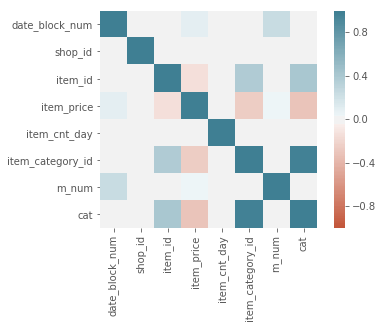

In [29]:
# Correltation matrix heatmap
corr = train.corr()

sns.heatmap(corr, vmin=-1, vmax=1, center=0, 
           cmap=sns.diverging_palette(20, 220, n=200), square=True)

Need to get correlation matrix of new features

In [30]:
train.corr()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,m_num,cat
date_block_num,1.000000,0.019360,0.009410,0.095593,0.009249,0.029485,0.244151,0.006886
shop_id,0.019360,1.000000,0.029302,-0.023892,-0.005703,0.019206,0.020754,0.021537
item_id,0.009410,0.029302,1.000000,-0.134340,0.028711,0.368331,-0.002319,0.410835
item_price,0.095593,-0.023892,-0.134340,1.000000,0.023308,-0.254603,0.044261,-0.310273
item_cnt_day,0.009249,-0.005703,0.028711,0.023308,1.000000,0.032347,0.032865,0.001526
item_category_id,0.029485,0.019206,0.368331,-0.254603,0.032347,1.000000,-0.001250,0.976186
m_num,0.244151,0.020754,-0.002319,0.044261,0.032865,-0.001250,1.000000,-0.007924
cat,0.006886,0.021537,0.410835,-0.310273,0.001526,0.976186,-0.007924,1.000000


If new features are too highly correlated with the features they are created from then we drop them because they don't add anything (unless they are highly correlated with item_cnt)

Try to get features that create new correlations (hopefully with item_cnt), but we can use if shows new correlations that weren't there before.


# New Layout

## Matrix # 1

### Train


Might have to move these matrixes to another notebook and only get different features here. Then test and validate matrix and features in another notebook. 

**Matrix index(rows):**
1. shop_id
2. item_id
3. cat
4. item_price?

**Matrix columns:**
1. date_block_num
2. m_num (month number)

In [31]:
## Pivot by monht to wide format
train_df = train.pivot_table(index=['shop_id','item_id', 'cat', 'item_price'], columns=['date_block_num', 'm_num'], values='item_cnt_day',aggfunc='sum').fillna(0.0)
train_df.head(20)

date_block_num                   0     1    2    3    4    5    6    7    8   \
m_num                            1     2    3    4    5    6    7    8    9    
shop_id item_id cat item_price                                                 
0       30      7.0 265.0       0.0  31.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        31      7.0 434.0       0.0  11.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        32      7.0 221.0       6.0  10.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        33      7.0 347.0       3.0   3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        35      7.0 247.0       1.0  14.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        36      7.0 357.0       0.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        40      9.0 127.0       0.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        42      9.0 127.0       0.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        43      7.0 221.0       1.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        49      9.0 127.0       0.0   2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        51      9.0 127.0       1.0   3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
                    130.0       1.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        57      9.0 167.0       0.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        59      9.0 110.0       0.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        61      8.0 195.0       1.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        75      7.0 76.0        1.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        85      7.0 190.0       0.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        88      7.0 76.0        1.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        95      7.0 193.0       1.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        96      7.0 70.0        1.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

date_block_num                   9   ...   24   25   26   27   28   29   30  \
m_num                            10  ...   1    2    3    4    5    6    7    
shop_id item_id cat item_price       ...                                      
0       30      7.0 265.0       0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        31      7.0 434.0       0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        32      7.0 221.0       0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        33      7.0 347.0       0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        35      7.0 247.0       0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        36      7.0 357.0       0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        40      9.0 127.0       0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        42      9.0 127.0       0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        43      7.0 221.0       0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        49      9.0 127.0       0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        51      9.0 127.0       0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
                    130.0       0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        57      9.0 167.0       0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        59      9.0 110.0       0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        61      8.0 195.0       0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        75      7.0 76.0        0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        85      7.0 190.0       0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        88      7.0 76.0        0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        95      7.0 193.0       0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        96      7.0 70.0        0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

date_block_num                   31   32   33  
m_num                            8    9    10  
shop_id item_id cat item_price                 
0       30      7.0 265.0       0.0  0.0  0.0  
        31      7.0 434.0       0.0  0.0  0.0  
        32      7.0 221.0       0.0  0.0  0.0  
        33      7.0 347.0       0.0  0.0  0.0  
     

## Matrix # 2

#### Train

This is a way to possibly include each column we want and still calculate the items sold per month for each item and shop combo. The only problem is this one won't input lagging monthly sales as well as the other. 

In [32]:
traintest.reset_index().groupby(['date_block_num','shop_id', 'item_id', 'm_num']).mean()

index  item_category_id  \
date_block_num shop_id item_id m_num                               
0.0            0       32      1.0     39988.5              40.0   
                       33      1.0     39992.0              37.0   
                       35      1.0     39994.0              40.0   
                       43      1.0     39997.0              40.0   
                       51      1.0     39995.5              57.0   
...                                        ...               ...   
34.0           59      22162   11.0   149575.0               NaN   
                       22163   11.0   148799.0               NaN   
                       22164   11.0   149242.0               NaN   
                       22166   11.0   152328.0               NaN   
                       22167   11.0   148377.0               NaN   

                                      item_cnt_day  item_price  Revenue  cat  
date_block_num shop_id item_id m_num                                          
0.0            0       32      1.0             1.5       221.0    331.5  7.0  
                       33      1.0             1.0       347.0    347.0  7.0  
                       35      1.0             1.0       247.0    247.0  7.0  
                       43      1.0             1.0       221.0    221.0  7.0  
                       51      1.0             1.0       128.5    128.5  9.0  
...                                            ...         ...      ...  ...  
34.0           59      22162   11.0            NaN         NaN      NaN  NaN  
                       22163   11.0            NaN         NaN      NaN  NaN  
                       22164   11.0            NaN         NaN      NaN  NaN  
                       22166   11.0            NaN         NaN      NaN  NaN  
                       22167   11.0            NaN         NaN      NaN  NaN  

[1822378 rows x 6 columns]

In [33]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,Month,m_num,item_category_name_,cats,cat
0,2013-01-02,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Jan,1,Кино - Blu-Ray,Movie,7.0
1,2013-01-03,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Jan,1,Музыка - Винил,Music,9.0
2,2013-01-06,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",Jan,1,Музыка - Винил,Music,9.0
3,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",Jan,1,Музыка - CD фирменного производства,Music,9.0
4,2013-01-10,0,25,2564,349.00,1.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,"Москва ТРК ""Атриум""",Jan,1,Музыка - Музыкальное видео,Music,9.0


### Final Test Data

We want the final train and test data to have categories of:
item_id
shop_id
cat (the combined category)
month
previous month's sales
previous month's revenue

Test data columns: shop_id, item_id, item_category_id, cat, item_price, date_block_num: 34, Month: Nov, m_num: 11

### Separate Test Data that Does NOT have item_id in Train Data

In [34]:
train_shop_ids = train['shop_id'].unique()
train_item_ids = train['item_id'].unique()
# Only test shops that exist in train set.
lk_test = test[test['shop_id'].isin(train_shop_ids)]
# Only test items that exist in train set.
lk_test = lk_test[lk_test['item_id'].isin(train_item_ids)]

The above code would get us the data that is in both sets. Now we can subtract the items in both train and test from the items in the test set to determine how many items are in only the test set. 

In [35]:
print('Test set size before drop:', test.shape[0])
print('Test set size after drop:', lk_test.shape[0])

Test set size before drop: 214200
Test set size after drop: 198954


So the total number of test values that are not in the train set are:
214,200 - 198,954 = 15,246

This is made up of 363 unique items and '' unique shops

So 15,246 of the 214,200 don't have the labels (cat, price) or previous month sales
This is 7.12% of the test set that will not be able to use that data

## Summary


We should be able to use Matrix #1 to calculate the item count per month for items in the train data that are also in the test data. However for items that are in the test data, but are not in the train data, this will not work because all of their categories, price, and previous months will be zero so they will have no predictive value. That means for those items we need to use another model

We're going to have to make a model that can predict the value in the months based off of the shop_id, item_id, month of year, date_block_num. We might even have to try to predict the amount for the whole year for each of those items(might be easier). 

We're also going to try to do predictions with Matrix #2, which will try to incorporate some of the other features like Revenue, holidays, lagging sales data, mean sales data, etc.

## Output


Should be able to take these two matrices above and use them to split, train, and validate the model before running the test data.

Train Table output

In [36]:
train_df.to_csv('Table_Train.csv', index=False)

Traintest Data output


In [37]:
traintest.to_csv('Traintest.csv', index=False)

We are gonna want to import the entire traintest dataset and then split it at the test data (where date_block_num = 34). 